## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.   
    - Are there categories where being a best-seller is more prevalent? 
    	
*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [22]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python

%matplotlib inline
pd.set_option('display.max_columns', None)

In [23]:
amazon = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [24]:
display(amazon.head())
display(amazon.shape)
display(amazon.info())

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


(2443651, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


None

In [25]:
category_vs_best_sell = pd.crosstab(amazon['category'], amazon['isBestSeller'])
category_vs_best_sell.head()

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3


In [26]:
display(category_vs_best_sell.info())


<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 3D Printers to eBook Readers & Accessories
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   False   296 non-null    int64
 1   True    296 non-null    int64
dtypes: int64(2)
memory usage: 6.9+ KB


None

In [27]:
category_vs_best_sell_sorted = category_vs_best_sell.sort_values(by=True, ascending=False)
print(category_vs_best_sell_sorted.head())

isBestSeller             False  True 
category                             
Grocery                   9008    556
Health & Personal Care    9017    552
Baby                     14709    341
Sports & Outdoors       835935    330
Power & Hand Tools        8353    306


In [ ]:
# Creating a table, which includes additional columns for the amount of total products in each category and best seller rate in %
result = category_vs_best_sell.copy()
result['Total'] = result[False] + result[True]
result['BestSeller_Rate_%'] = ((result[True] / result['Total']) * 100).round(2)
result_sorted = result.sort_values(by='BestSeller_Rate_%', ascending=False)
print(result_sorted.head())



isBestSeller                    False  True  Total  BestSeller_Rate_%
category                                                             
Grocery                          9008   556   9564               5.81
Smart Home Security & Lighting     98     6    104               5.77
Health & Personal Care           9017   552   9569               5.77
Mobile Phone Accessories          248    11    259               4.25
Power & Hand Tools               8353   306   8659               3.53


**Are there categories where being a best-seller is more prevalent?**

**Answer:** Yes, the categories "Grocery", "Smart Home Security & Lighting", and "Health & Personal Care" have the highest rate of best selling products (5.81%, 5.77% and 5.77%, respectively). These categories are followed by "Mobile Phone Accessories" and "Power & Hand Tools" (4.25% and 3.53% of the best selling products, respectively).

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [99]:
# --- PREPARE DATA ---
# Get top 10 largest categories using the Total column
top_10_largest_idx = result['Total'].nlargest(10).index  # Get the index (category names)
data_largest = result.loc[top_10_largest_idx]  # Select those 10 rows
display(data_largest)

# Leave only the columns needed for plotting the stacked bar chart (removing the columns not needed for the graph)
data_largest_mod = data_largest.drop(['Total', 'BestSeller_Rate_%'], axis=1)
display(data_largest_mod)

# Remove the largest category to see better other categories in a graph
data_largest_mod2=data_largest_mod.drop('Sports & Outdoors', axis=0)
display(data_largest_mod2)

# Percentages
top10_normalized = data_largest_mod.div(data_largest_mod.sum(axis=1), axis=0) * 100
display(top10_normalized)

# Get top 10 by best seller rate
top_10_best_rate_idx = result['BestSeller_Rate_%'].nlargest(10).index
data_best_rate = result.loc[top_10_best_rate_idx]
display(data_best_rate)

# Percentages for top 10 best sellers
data_best_rate2 = data_best_rate.drop(['Total', 'BestSeller_Rate_%'], axis=1)
best_sellers_pct = data_best_rate2.div(data_best_rate2.sum(axis=1), axis=0) * 100
display(best_sellers_pct)



isBestSeller,False,True,Total,BestSeller_Rate_%
category,,,,
Sports & Outdoors,835935,330,836265,0.04
Beauty,19010,302,19312,1.56
"Handmade Clothing, Shoes & Accessories",19215,14,19229,0.07
Bath & Body,19059,33,19092,0.17
Birthday Gifts,18943,35,18978,0.18
Manicure & Pedicure Products,18882,58,18940,0.31
Skin Care,18711,58,18769,0.31
Make-up,18715,41,18756,0.22
Hair Care,18665,70,18735,0.37


isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
Beauty,19010,302
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Birthday Gifts,18943,35
Manicure & Pedicure Products,18882,58
Skin Care,18711,58
Make-up,18715,41
Hair Care,18665,70


isBestSeller,False,True
category,,
Beauty,19010,302
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Birthday Gifts,18943,35
Manicure & Pedicure Products,18882,58
Skin Care,18711,58
Make-up,18715,41
Hair Care,18665,70
Fragrances,18550,14


isBestSeller,False,True
category,,
Sports & Outdoors,99.960539,0.039461
Beauty,98.436205,1.563795
"Handmade Clothing, Shoes & Accessories",99.927193,0.072807
Bath & Body,99.827153,0.172847
Birthday Gifts,99.815576,0.184424
Manicure & Pedicure Products,99.693770,0.306230
Skin Care,99.690980,0.309020
Make-up,99.781403,0.218597
Hair Care,99.626368,0.373632


isBestSeller,False,True,Total,BestSeller_Rate_%
category,,,,
Grocery,9008,556,9564,5.81
Health & Personal Care,9017,552,9569,5.77
Smart Home Security & Lighting,98,6,104,5.77
Mobile Phone Accessories,248,11,259,4.25
Power & Hand Tools,8353,306,8659,3.53
"Billiard, Snooker & Pool",241,8,249,3.21
Pet Supplies,9152,285,9437,3.02
Home Brewing & Wine Making,239,7,246,2.85
Mirrors,243,7,250,2.80


isBestSeller,False,True
category,,
Grocery,94.186533,5.813467
Health & Personal Care,94.231372,5.768628
Smart Home Security & Lighting,94.230769,5.769231
Mobile Phone Accessories,95.752896,4.247104
Power & Hand Tools,96.466105,3.533895
"Billiard, Snooker & Pool",96.787149,3.212851
Pet Supplies,96.979972,3.020028
Home Brewing & Wine Making,97.154472,2.845528
Mirrors,97.200000,2.800000


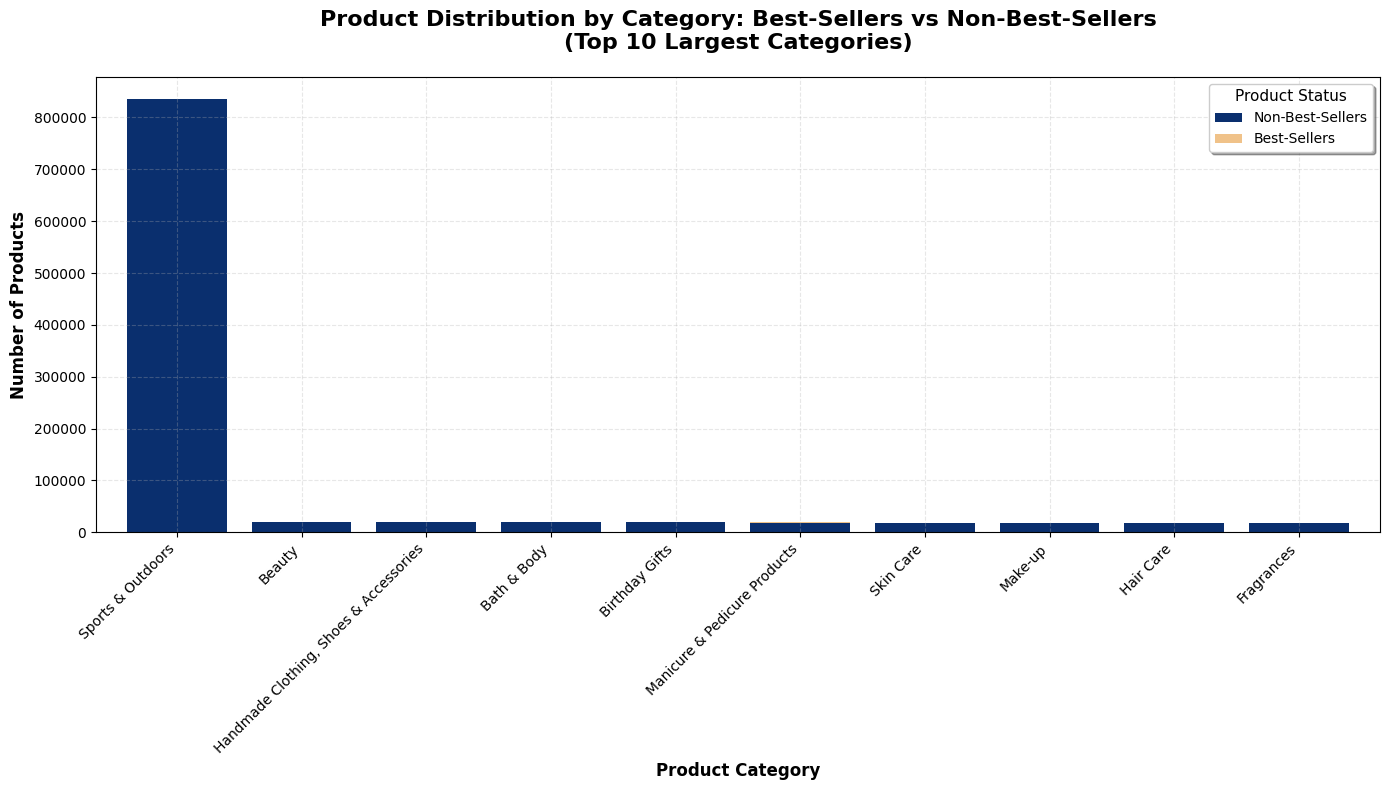

In [90]:
# Plotting a stacked bar chart for the 'data_largest' data

data_largest_mod.plot(
    kind='bar', 
    stacked=True,
    figsize=(14, 8),
    color=["#0A2F6E", "#F0C289"],
    width=0.8
    )

# Titles and labels
plt.title("Product Distribution by Category: Best-Sellers vs Non-Best-Sellers\n(Top 10 Largest Categories)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Products', fontsize=12, fontweight='bold')

# Improve legend
plt.legend(
    ['Non-Best-Sellers', 'Best-Sellers'],  # Better legend labels
    title='Product Status',                 # Legend title
    title_fontsize=11,
    fontsize=10,
    loc='upper right',                      # Position
    frameon=True,                          # Show legend box
    fancybox=True,                         # Rounded corners
    shadow=True                            # Add shadow
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better
plt.yticks(fontsize=10)

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()  # ← ADD THIS to prevent cutoff
plt.show()

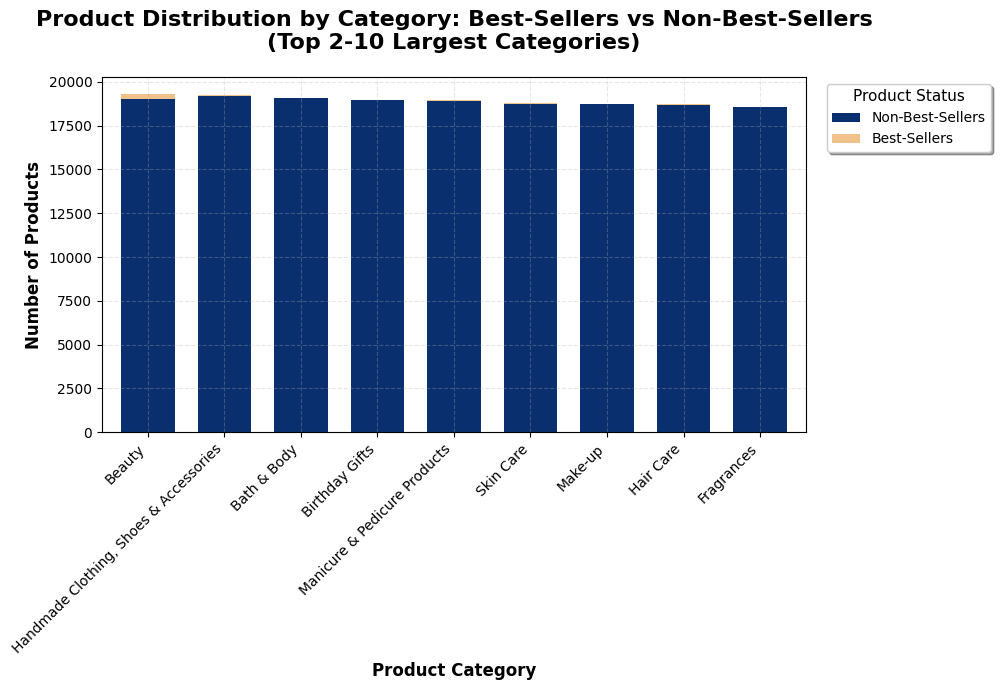

In [94]:
# Plotting a stacked bar chart for the 'data_largest' data

data_largest_mod2.plot(
    kind='bar', 
    stacked=True,
    figsize=(10, 7),
    logy=False,  
    color=["#0A2F6E", "#F0C289"],
    width=0.7
    )

# Titles and labels
plt.title("Product Distribution by Category: Best-Sellers vs Non-Best-Sellers\n(Top 2-10 Largest Categories)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Products', fontsize=12, fontweight='bold')

# Improve legend
plt.legend(
    ['Non-Best-Sellers', 'Best-Sellers'],  # Better legend labels
    title='Product Status',                 # Legend title
    title_fontsize=11,
    fontsize=10,
    loc='upper left',                    # Anchor point of the legend box
    bbox_to_anchor=(1.02, 1),           # Position: (x, y) - slightly right (1.02) of plot, at top (1)
    frameon=True,                          # Show legend box
    fancybox=True,                         # Rounded corners
    shadow=True                            # Add shadow
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better
plt.yticks(fontsize=10)

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()  # ← ADD THIS to prevent cutoff
plt.show()

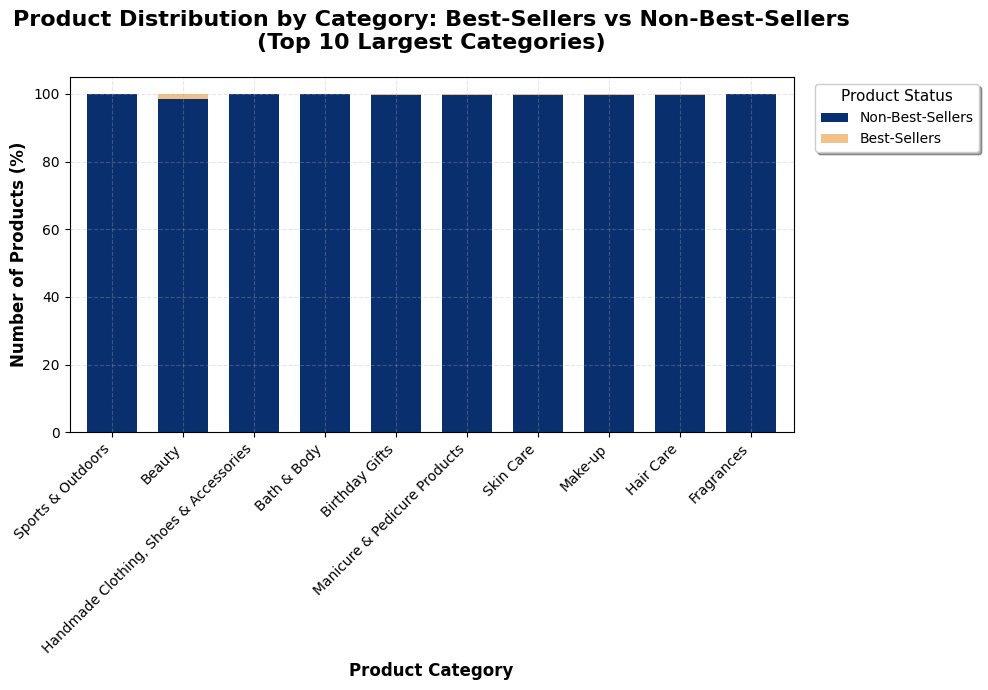

In [98]:
# Plotting a stacked bar chart for the 'data_largest' data normalized

top10_normalized.plot(
    kind='bar', 
    stacked=True,
    figsize=(10, 7),
    logy=False,  
    color=["#0A2F6E", "#F0C289"],
    width=0.7
    )

# Titles and labels
plt.title("Product Distribution by Category: Best-Sellers vs Non-Best-Sellers\n(Top 10 Largest Categories)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel("Number of Products (%)", fontsize=12, fontweight='bold')

# Improve legend
plt.legend(
    ['Non-Best-Sellers', 'Best-Sellers'],  # Better legend labels
    title='Product Status',                 # Legend title
    title_fontsize=11,
    fontsize=10,
    loc='upper left',                    # Anchor point of the legend box
    bbox_to_anchor=(1.02, 1),           # Position: (x, y) - slightly right (1.02) of plot, at top (1)
    frameon=True,                          # Show legend box
    fancybox=True,                         # Rounded corners
    shadow=True                            # Add shadow
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better
plt.yticks(fontsize=10)

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()  # ← ADD THIS to prevent cutoff
plt.show()

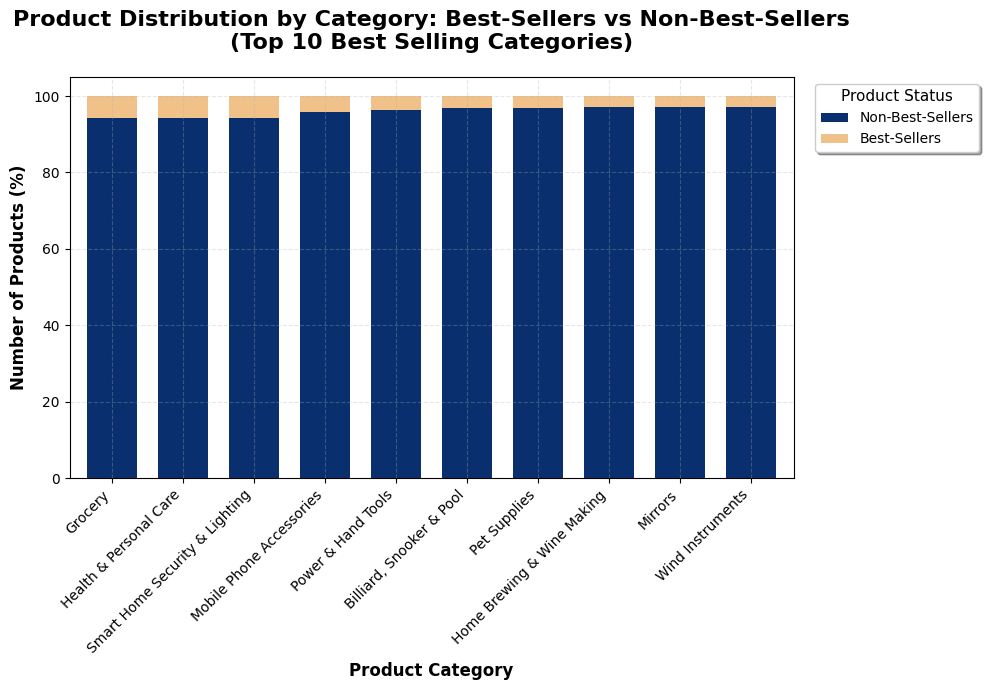

In [101]:
# Plotting a stacked bar chart for the top 10 best sellers in percents

best_sellers_pct.plot(
    kind='bar', 
    stacked=True,
    figsize=(10, 7),
    logy=False,  
    color=["#0A2F6E", "#F0C289"],
    width=0.7
    )

# Titles and labels
plt.title("Product Distribution by Category: Best-Sellers vs Non-Best-Sellers\n(Top 10 Best Selling Categories)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel("Number of Products (%)", fontsize=12, fontweight='bold')

# Improve legend
plt.legend(
    ['Non-Best-Sellers', 'Best-Sellers'],  # Better legend labels
    title='Product Status',                 # Legend title
    title_fontsize=11,
    fontsize=10,
    loc='upper left',                    # Anchor point of the legend box
    bbox_to_anchor=(1.02, 1),           # Position: (x, y) - slightly right (1.02) of plot, at top (1)
    frameon=True,                          # Show legend box
    fancybox=True,                         # Rounded corners
    shadow=True                            # Add shadow
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better
plt.yticks(fontsize=10)

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()  # ← ADD THIS to prevent cutoff
plt.show()

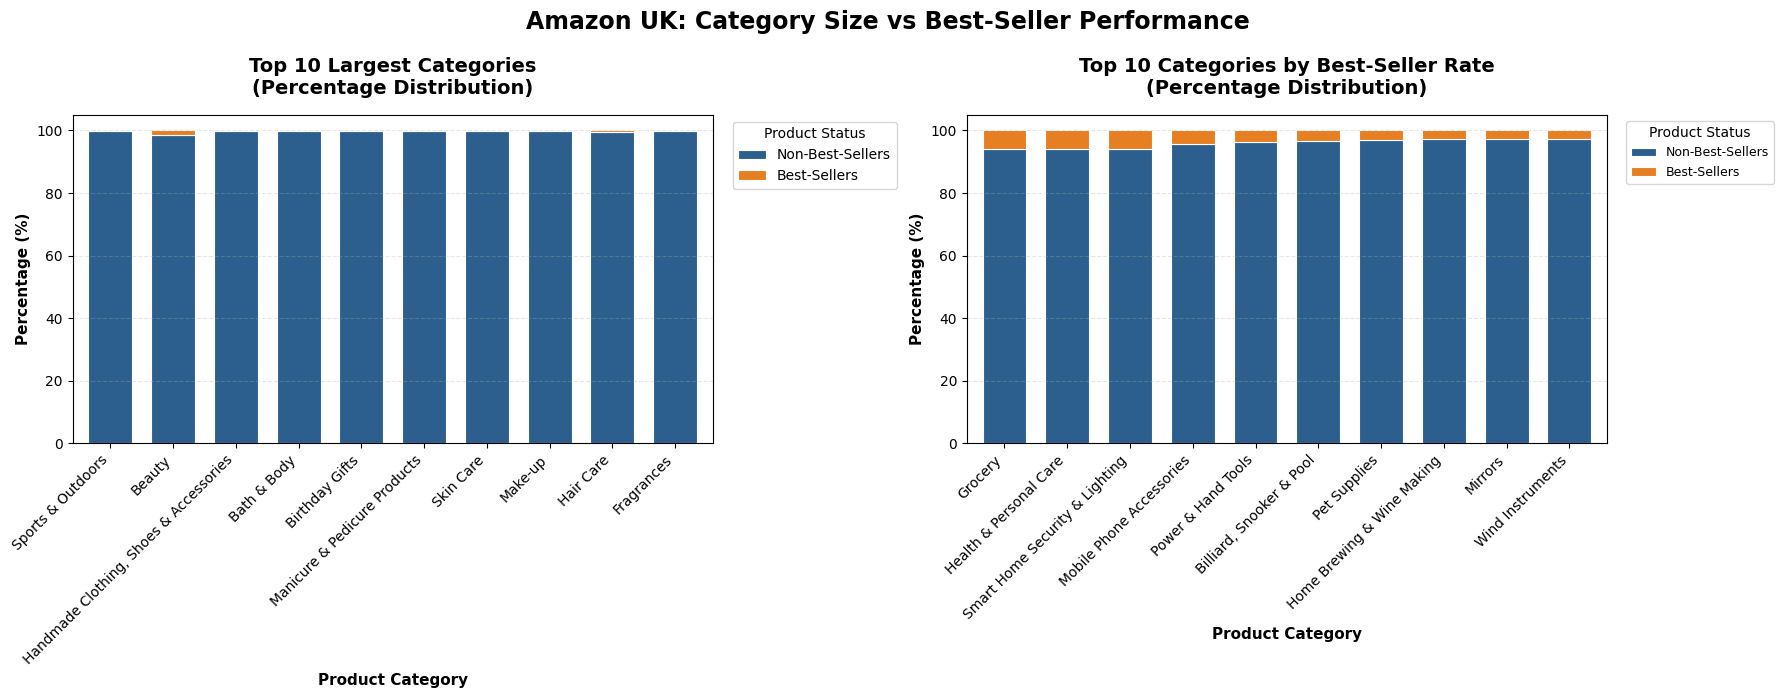

In [ ]:
# Create figure with 1 row, 2 columns (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ===== PLOT 1 (LEFT): Top 10 Largest Categories (Normalized %) =====
top10_normalized.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],  # First subplot (left)
    color=['#2C5F8D', '#E67E22'],  # Blue and Orange
    width=0.7,
    edgecolor='white',
    linewidth=0.8
)

# Titles and labels for Plot 1
axes[0].set_title(
    'Top 10 Largest Categories\n(Percentage Distribution)', 
    fontsize=14, 
    fontweight='bold',
    pad=15
)
axes[0].set_xlabel('Product Category', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
axes[0].set_ylim(0, 105)  # Since it's percentages, set y-axis to 0-100
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')  # rotation to the left changes the start of a label==>fix 
axes[0].tick_params(axis='y', labelsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--', axis='y')

# Legend for Plot 1
# Legend outside to the right
axes[0].legend(
    ['Non-Best-Sellers', 'Best-Sellers'],
    title='Product Status', loc='upper left',
    bbox_to_anchor=(1.02, 1), frameon=True
)


# ===== PLOT 2 (RIGHT): Top 10 Best Selling Categories =====
best_sellers_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],  # Second subplot (right)
    color=['#2C5F8D', '#E67E22'],  # Same colors for consistency
    width=0.7,
    edgecolor='white',
    linewidth=0.8
)

# Titles and labels for Plot 2
axes[1].set_title(
    'Top 10 Categories by Best-Seller Rate\n(Percentage Distribution)', 
    fontsize=14, 
    fontweight='bold',
    pad=15
)
axes[1].set_xlabel('Product Category', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
axes[1].set_ylim(0, 105)  # Since it's percentages, set y-axis to 0-110
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
axes[1].tick_params(axis='y', labelsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--', axis='y')

# Legend for Plot 2
axes[1].legend(
    ['Non-Best-Sellers', 'Best-Sellers'],
    title='Product Status',
    title_fontsize=10,
    fontsize=9,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=True
)

# Overall title for the entire figure
fig.suptitle('Amazon UK: Category Size vs Best-Seller Performance', 
             fontsize=17, fontweight='bold', y=0.99)

# THIS IS THE KEY LINE - Makes plots narrower to leave room for legends!
plt.subplots_adjust(right=0.85, wspace=0.3)  # right=0.85 means plots only use 85% of figure width
                                              # wspace=0.3 adds space between the two plots

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [118]:
display(amazon.head())
display(amazon.shape)
amazon.describe().T

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


(2443651, 9)

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [119]:
low_limit = amazon['price'].quantile(0.25)-1.5*(amazon['price'].quantile(0.75)-amazon['price'].quantile(0.25))
high_limit = amazon['price'].quantile(0.75)+1.5*(amazon['price'].quantile(0.75)-amazon['price'].quantile(0.25))

amazon_no_outliers=amazon[(amazon['price'] > low_limit) & (amazon['price'] < high_limit)] 
amazon_no_outliers.shape

(2115963, 9)

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [122]:
len(amazon_no_outliers['category'].unique())

296

In [ ]:
# Creating a dataframe with no outliers and having only top 20 categories
categories=amazon_no_outliers.groupby('category')['title'].count() 
type(categories)
top20_cat=categories.nlargest(20)
top20_df=amazon_no_outliers.copy()

# Filter dataframe to keep only rows with top 20 categories
top20_df = amazon_no_outliers[amazon_no_outliers['category'].isin(top20_cat.index)]

print(top20_df.shape)


(1033008, 9)


C:\Users\julia\AppData\Local\Temp\ipykernel_19248\707198263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


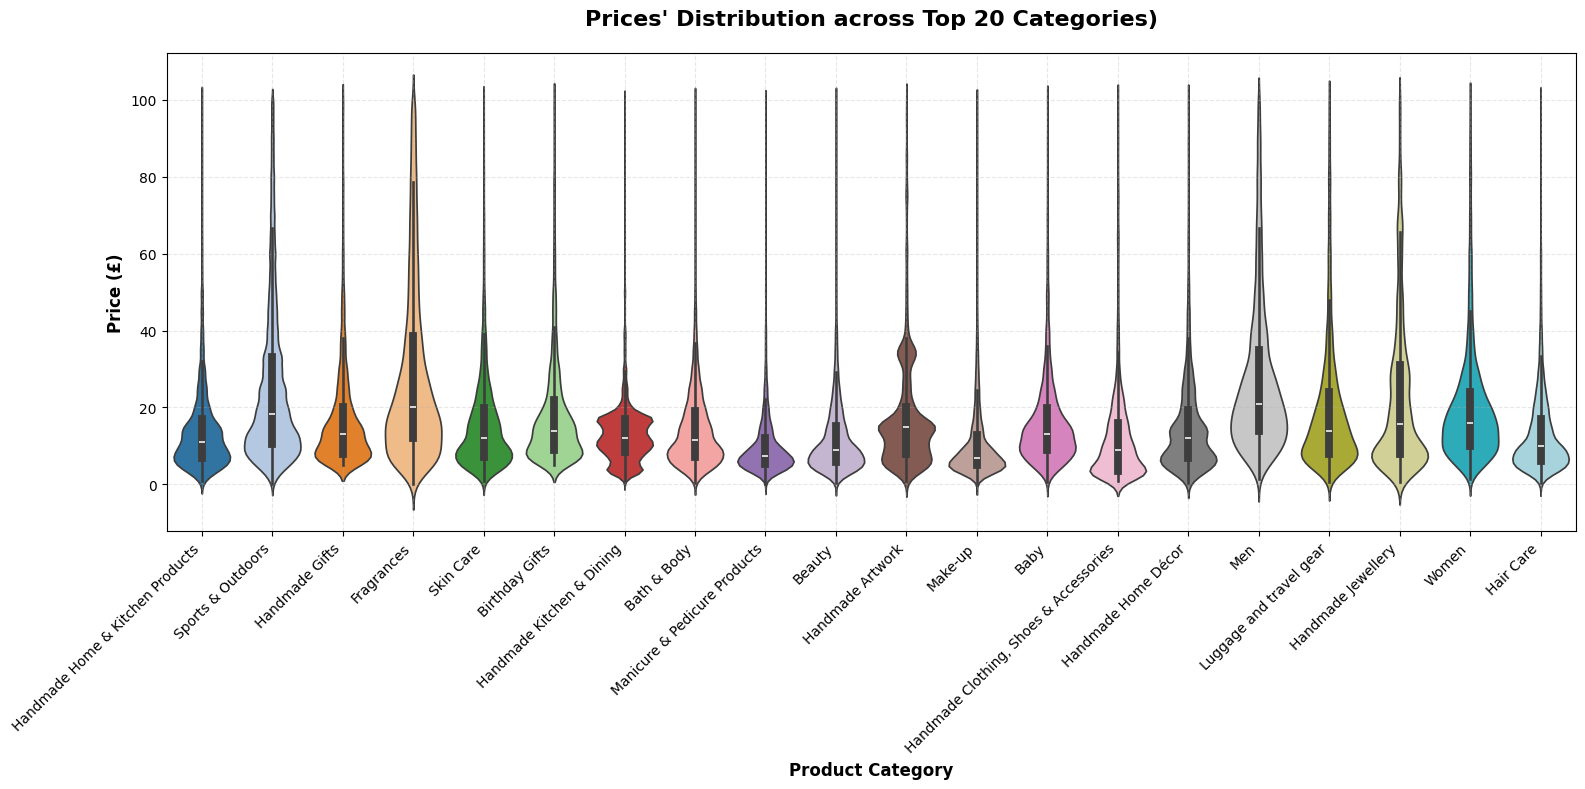

In [ ]:
# Plotting a violin plot to visualize the distribution of 'price' for each 'category', using the "tab20" color palette
plt.figure(figsize=(16, 8))

sns.violinplot(
    data=top20_df, 
    x="category", 
    y="price", 
    palette="tab20"
    )

# Titles and labels
plt.title("Prices' Distribution across Top 20 Categories)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel("Price (£)", fontsize=12, fontweight='bold')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()
plt.show()

In [143]:
prices_median=amazon_no_outliers.groupby('category')['price'].median()
display(prices_median)                         
prices_median.sort_values(ascending=False) 


category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

Which product category tends to have the highest median price? Don't filter here by top categories.

Answer: 'Desktop PCs' category has the highest median price.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [ ]:
# Leaving only top 10 categories, categories is a Series, containing categories and count of the products in each category
top10_cat=categories.nlargest(10)
top10_df=amazon_no_outliers.copy()

# Filter dataframe to keep only rows with top 10 categories
top10_df = amazon_no_outliers[amazon_no_outliers['category'].isin(top10_cat.index)]

print(top10_df.shape)

(862465, 9)


C:\Users\julia\AppData\Local\Temp\ipykernel_19248\1947688316.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(
C:\Users\julia\AppData\Local\Temp\ipykernel_19248\1947688316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


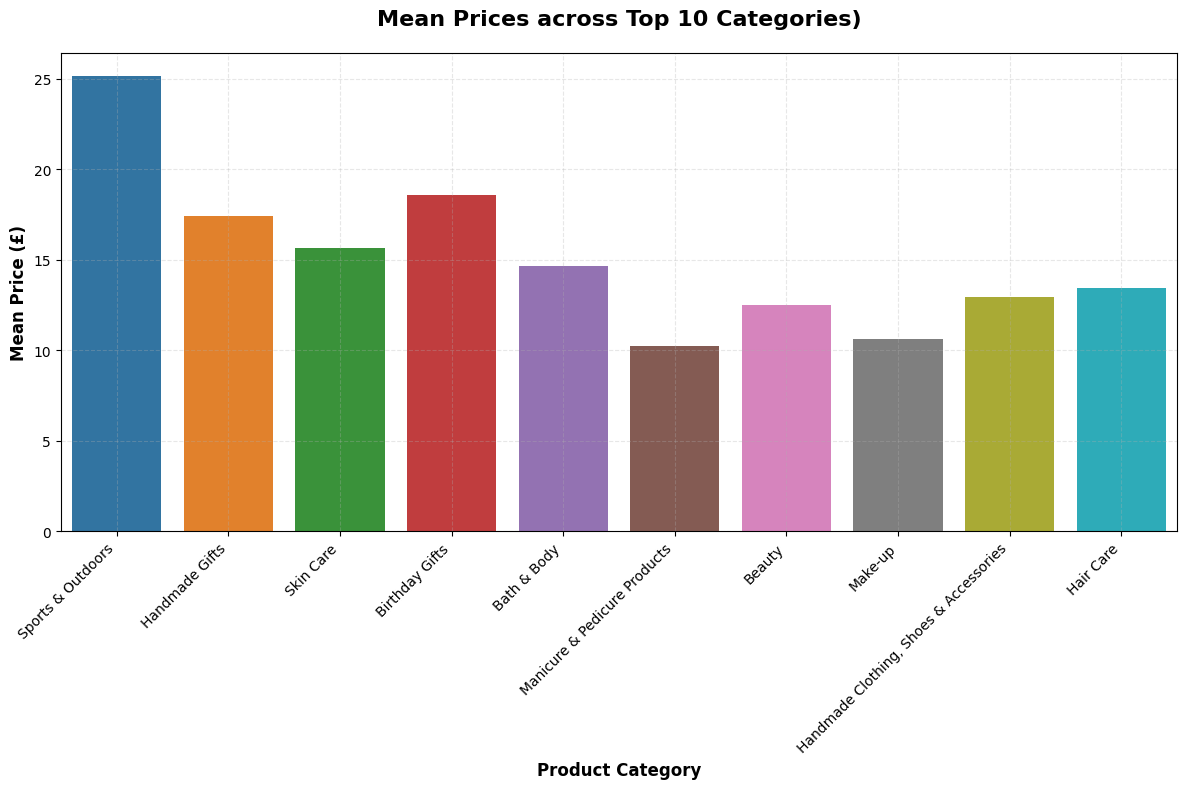

In [160]:
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    x="category", 
    y="price", 
    data=top10_df,
    ci=None, 
    palette="tab10"
    )

# Titles and labels
plt.title("Mean Prices across Top 10 Categories)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel("Mean Price (£)", fontsize=12, fontweight='bold')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()
plt.show()

In [161]:
prices_mean=amazon_no_outliers.groupby('category')['price'].mean()
display(prices_mean)                         
prices_mean.sort_values(ascending=False)

category
3D Printers                       55.739722
3D Printing & Scanning            35.623904
Abrasive & Finishing Products     14.427611
Action Cameras                    38.936875
Adapters                           8.750197
                                    ...    
Wind Instruments                  18.935339
Window Treatments                 19.870633
Women                             20.408735
Women's Sports & Outdoor Shoes    49.425894
eBook Readers & Accessories       26.006952
Name: price, Length: 296, dtype: float64

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

Which product category commands the highest average price? Don't filter here by top categories.

Answer: Category 'Motherboards" has the highest average price.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\julia\AppData\Local\Temp\ipykernel_19248\3317758671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


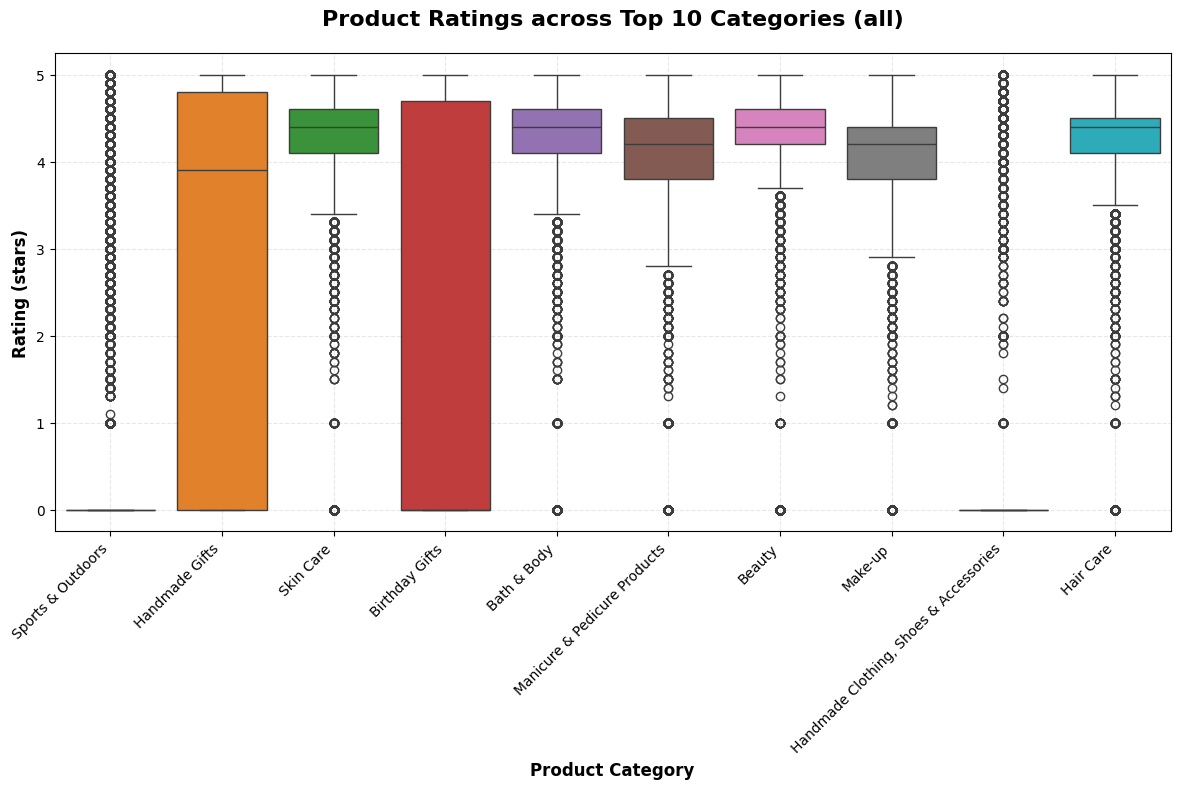

In [165]:
# Plotting boxplot of product ratings ('stars') based on their category for top 10 categories
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=top10_df, 
    x="category", 
    y="stars", 
    palette="tab10", 
    legend=True
    )
# Titles and labels
plt.title("Product Ratings across Top 10 Categories (all)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel("Rating (stars)", fontsize=12, fontweight='bold')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()
plt.show()

In [164]:
top10_df_with_rating=top10_df[top10_df['stars'] > 0]
top10_df_with_rating.shape

(255042, 9)

C:\Users\julia\AppData\Local\Temp\ipykernel_19248\1944949792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


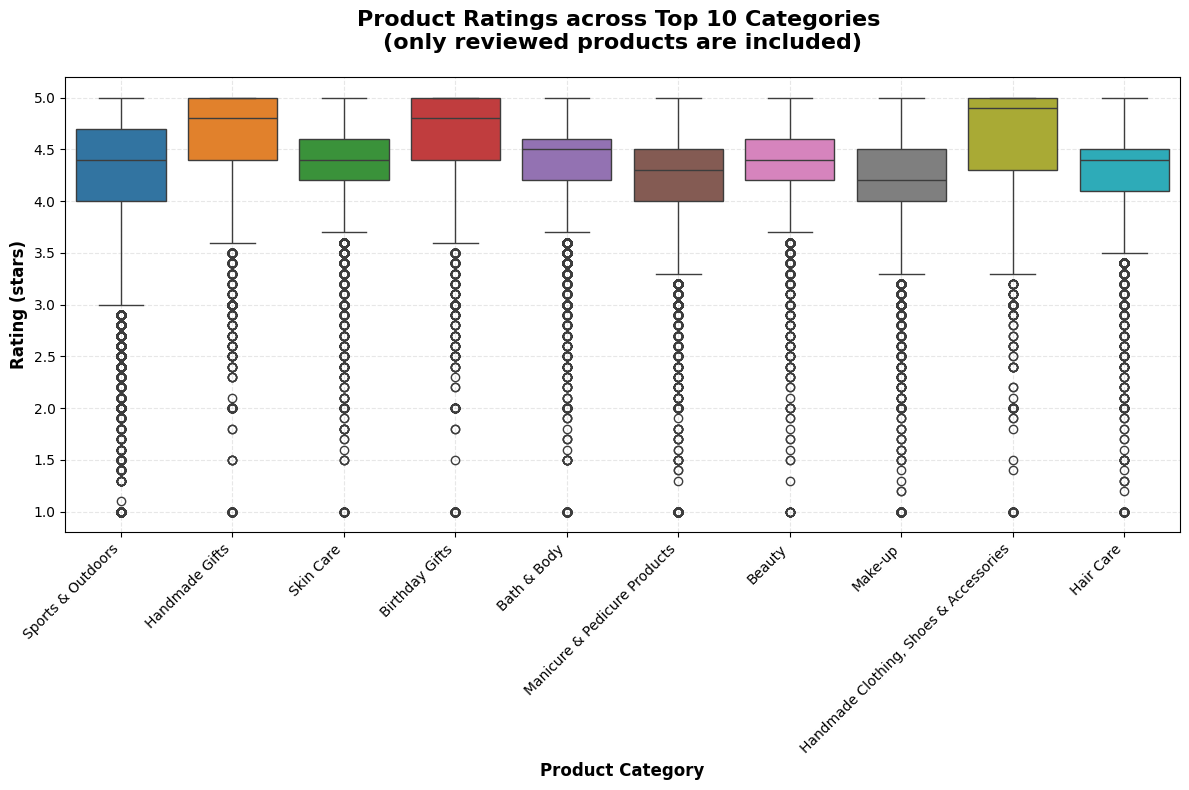

In [167]:
# Plotting boxplot of product ratings ('stars') based on their category for top 10 categories, excluding empty reviews (rating=0)
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=top10_df_with_rating, 
    x="category", 
    y="stars", 
    palette="tab10", 
    legend=True
    )
# Titles and labels
plt.title("Product Ratings across Top 10 Categories \n(only reviewed products are included)", 
          fontsize=16, 
          fontweight='bold',
          pad=20    # add space between the title and a plot
          )

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel("Rating (stars)", fontsize=12, fontweight='bold')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # ha='right' aligns text better

# Add grid for better readability (especially with log scale)
plt.grid(True, alpha=0.3, linestyle='--', which='both')  # 'both' shows major & minor grid

plt.tight_layout()
plt.show()

In [169]:
#Filtering data to exclude data without ratings ('stars'=0)
amazon_no_outliers_with_rating=amazon_no_outliers[amazon_no_outliers['stars'] > 0]
amazon_no_outliers_with_rating.shape

# Finding median ratings for all the product categories and sorting them in a descending order
median_stars = amazon_no_outliers_with_rating.groupby('category')['stars'].median()
median_stars_sorted = median_stars.sort_values(ascending=False)
median_stars_sorted

category
Handmade Artwork                          5.0
Made in Italy Handmade                    5.0
Handmade Baby Products                    5.0
Handmade Clothing, Shoes & Accessories    4.9
Handmade Kitchen & Dining                 4.9
                                         ... 
Mobile Phones & Smartphones               3.9
Camcorders                                3.8
Media Streaming Devices                   3.8
Action Cameras                            3.8
Motorbike Instruments                     3.7
Name: stars, Length: 296, dtype: float64

In [172]:
amazon_no_outliers_with_rating.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [175]:
# Adding an information regarding the amount of reviews for the best rated categories (median rating)
reviews_by_cat = amazon_no_outliers_with_rating.groupby('category')['reviews'].sum()

for i in range (3):
    category_name = median_stars_sorted.index[i]  # Get the category name
    rating_value = median_stars_sorted.iloc[i]     # Get the rating value
    reviews_count = reviews_by_cat[category_name]  # Get the review count
    
    print(f"The product category {category_name} has rating {rating_value} based on {reviews_count} reviews")

The product category Handmade Artwork has rating 5.0 based on 53650 reviews
The product category Made in Italy Handmade has rating 5.0 based on 1790 reviews
The product category Handmade Baby Products has rating 5.0 based on 14157 reviews


In [174]:
%whos

Variable                         Type         Data/Info
-------------------------------------------------------
amazon                           DataFrame    Shape: (2443651, 9)
amazon_no_outliers               DataFrame    Shape: (2115963, 9)
amazon_no_outliers_with_rating   DataFrame    Shape: (1114343, 9)
axes                             ndarray      2: 2 elems, type `object`, 16 bytes
barplot                          Axes         Axes(0.0573506,0.328385;0.930149x0.598143)
best_seller_pct                  DataFrame    Shape: (296, 119)
best_seller_rate                 Series       Shape: (296,)
best_sellers_pct                 DataFrame    Shape: (10, 2)
categories                       Series       Shape: (296,)
category_vs_best_sell            DataFrame    Shape: (296, 2)
category_vs_best_sell_sorted     DataFrame    Shape: (296, 2)
data_best_rate                   DataFrame    Shape: (10, 4)
data_best_rate2                  DataFrame    Shape: (10, 2)
data_largest                

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.  

Answer: 3 categories have the highest median rating: Handmade Artwork, Made in Italy Handmade and Handmade Baby Products. 

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

Products with zero reviews (and consequently zero star ratings) were excluded from the correlation analysis, as these represent missing data rather than actual customer evaluations. This ensures the correlation coefficient reflects genuine price-rating relationships.

In [176]:
# Calculate the correlation coefficient between `price` and `stars`
correlation = amazon_no_outliers_with_rating['price'].corr(amazon_no_outliers_with_rating['stars'])

print(f"Correlation coefficient between price and stars: {correlation:.4f}")

Correlation coefficient between price and stars: 0.0067


In [179]:
# Interpret significance
if abs(correlation)>=0.7:
    strength = 'strong'
elif abs(correlation) >= 0.3:
    strength = 'moderate'
else:
    strength = 'weak'

direction = 'positive' if correlation > 0 else 'negative'

print(f"\n There is a {strength} {direction} correlation between product price and its rating")


 There is a weak positive correlation between product price and its rating


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

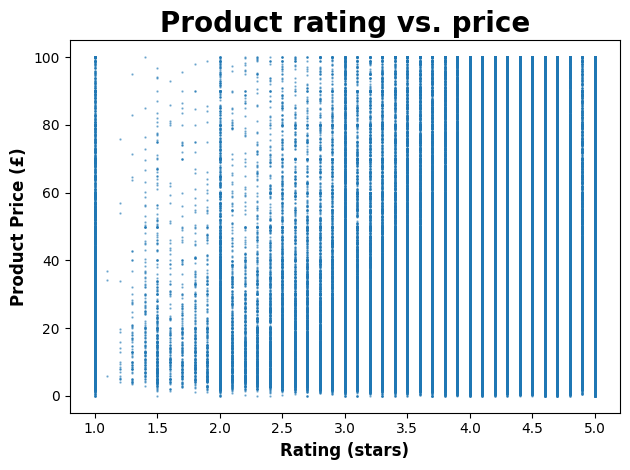

In [ ]:
plt.scatter(
    x=amazon_no_outliers_with_rating["stars"], 
    y=amazon_no_outliers_with_rating["price"], 
    s=0.5,
    alpha=0.5,     # 50% transparency (helps with overlapping points)
    )

# Adding labels to the x-axis and y-axis for better understanding.
plt.xlabel("Rating (stars)", fontsize=12, fontweight='bold')
plt.ylabel("Product Price (£)", fontsize=12, fontweight='bold')

# Setting a title for the scatter plot.
plt.title("Product rating vs. price", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

The graph shows no correlation between product ratings and its price. This is also shown by Pearson correlation efficient equal to 0.0067, indicating almost no correlation.  
Certain patterns can be observed in the scatter plot:  
 - Each rating has different price ranges (except ratings 1.1-1.3, which have lower prices).
 - For smaller ratings (~1.2-~3.4) the density of the products with lower prices is higher than the density of the products with higher prices. This theshold between two densities seems to appear like a line.

In [183]:
# General Selection
cat = amazon_no_outliers.select_dtypes(exclude="number")
num = amazon_no_outliers.select_dtypes(include="number")

In [196]:
# Replace stars = 0 with NaN (missing data), but keep reviews = 0 (true zero). A 0-star rating is invalid, but 0 reviews is meaningful 
# information that may correlate with price or sales. .corr() uses pairwise deletion for NaN values.

num_corr = num.copy()
num_corr['stars'] = num_corr['stars'].replace(0, np.nan)

correlation_matrix = num_corr.corr()

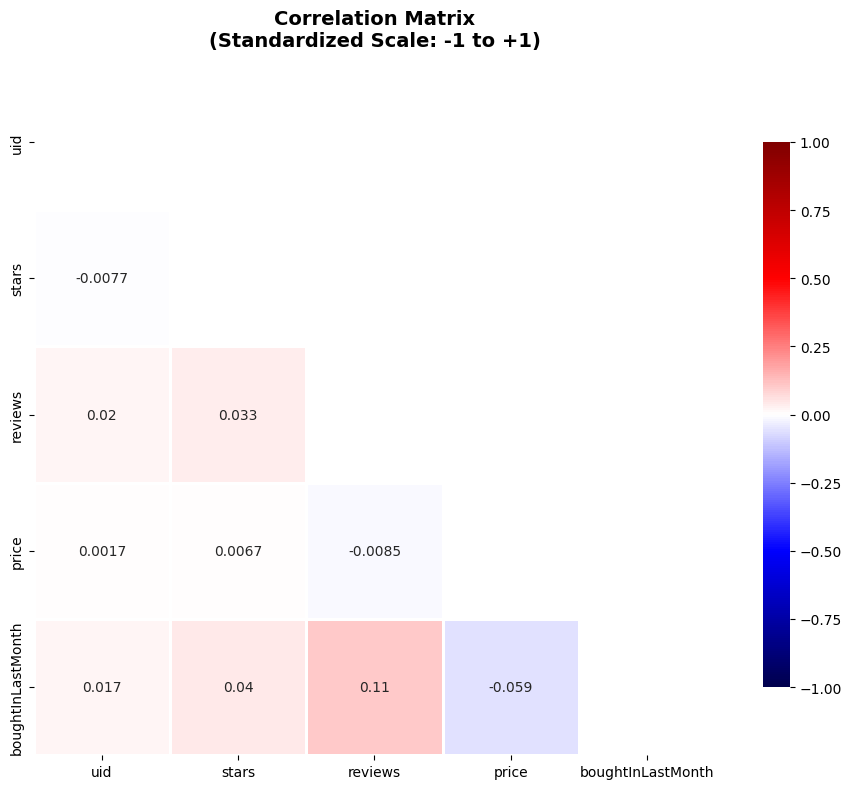

In [204]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    cmap="seismic",
    vmin=-1,              # Minimum value on color scale
    vmax=1,               # Maximum value on color scale
    center=0,             # Center the colormap at 0
    square=True,          # Make cells square-shaped
    linewidths=1,       # Add gridlines
    cbar_kws={"shrink": 0.8}  # Adjust colorbar size
)

plt.title('Correlation Matrix\n(Standardized Scale: -1 to +1)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


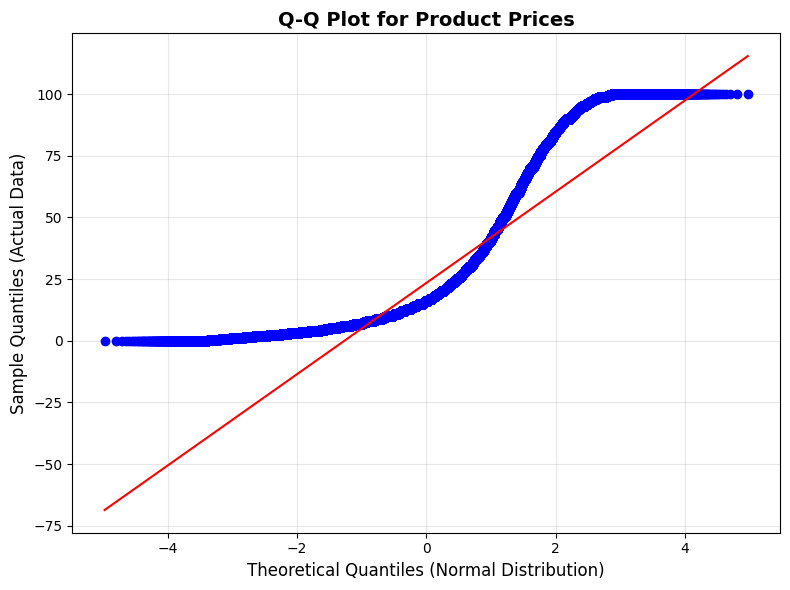

In [205]:
import scipy.stats as stats

# Create Q-Q plot for price data
plt.figure(figsize=(8, 6))

stats.probplot(amazon_no_outliers['price'], dist="norm", plot=plt)

plt.title('Q-Q Plot for Product Prices', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles (Normal Distribution)', fontsize=12)
plt.ylabel('Sample Quantiles (Actual Data)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Q-Q plot reveals that the product prices do not follow normal distribution, they have a positively skewed distribution with many low-priced items. A few expensive items create a long right tail.

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.

# **Amazon UK Market Analysis: Executive Summary**

---

## **Overall Objective**
Analyze product pricing dynamics on Amazon UK to uncover actionable insights that inform business strategies and optimize decision-making across categories.

---

## **Part 1: Category Performance & Best-Seller Analysis**

**Objective**: Understand the relationship between product categories and their best-seller status.

### Key Findings

**Market Concentration vs. Best-Seller Performance**
- The 10 largest product categories by volume are **not among the top 10 best-selling categories**, revealing a disconnect between category size and conversion performance
- Among the top 10 largest categories, **Beauty** leads with only 1.56% best-seller products, indicating significant untapped potential

**High-Performance Categories**

Top 5 categories by best-seller rate:
1. **Grocery** (5.81%)
2. **Smart Home Security & Lighting** (5.77%)
3. **Health & Personal Care** (5.77%)
4. **Mobile Phone Accessories** (4.25%)
5. **Power & Hand Tools** (3.53%)

**Strategic Insight**: These smaller, specialized categories demonstrate superior conversion rates, suggesting opportunities for targeted investment in niche markets rather than competing in saturated large categories.

---

## **Part 2: Price Distribution Analysis**

**Objective**: Investigate how different product categories influence product prices and understand pricing patterns.

### Overall Market Structure

**Distribution Characteristics**
- Q-Q plot analysis confirms that product prices follow a **right-skewed (positively skewed) distribution**, not a normal distribution
- Market is characterized by:
  - High concentration of low-priced items (£5-£20)
  - Long right tail of premium products
  - Few expensive products creating extended price range

**This pattern is typical for e-commerce platforms and indicates a budget-conscious consumer base with premium segment opportunities.**

### Category-Specific Price Insights

**Median Price Analysis (Top 20 Categories)**
- **Standard range**: £5-£20 across most categories
- **Premium positioning**: 
  - Handmade Home & Kitchen Products (£20-£25)
  - Sports & Outdoors (£20-£25)

**Price Concentration Patterns**

- **Budget-focused categories** (narrow distribution, £5-£15):
  - Handmade Kitchen & Dining
  - Skin Care
  - Birthday Gifts
  - Beauty
  - Hair Care

- **Variable pricing categories** (broader distribution, £30-£60):
  - Handmade Artwork
  - Fragrances
  - Men's products
  - Luggage and travel gear

**Premium Category Leaders (by mean price)**
1. **Motherboards** - £68.77 average
2. **Desktop PCs** - £74.00 median
3. **Boxing Shoes** - £69.79 median
4. **Tablets** - £69.00 median

**Top 10 Largest Categories**
- Mean price range: £10 (Manicure & Pedicure Products) to £25 (Sports & Outdoors)
- Consistently budget-to-mid-range pricing strategy

**Business Implication**: Amazon UK employs a high-volume, low-price strategy in major categories while maintaining premium segments for specialized products.

---

## **Part 3: Customer Satisfaction Analysis**

**Objective**: Evaluate product quality and customer satisfaction across categories.

### Overall Performance Metrics

**Strong Satisfaction Baseline**
- All top 10 categories achieve **median ratings between 4.2-4.9 stars**
- Indicates effective quality control and vendor management across Amazon's portfolio

**Premium Experience Leaders** (near 5.0-star medians):
- Handmade Clothing, Shoes & Accessories
- Handmade Gifts
- Birthday Gifts

**Perfect Rating Categories** (5.0-star median):
- Handmade Artwork
- Made in Italy Handmade
- Handmade Baby Products

**Strategic Insight**: Handmade categories consistently outperform mass-market categories in customer satisfaction, suggesting opportunities for premium positioning and higher margins.

### Quality Consistency Analysis

**Reliable Categories** (narrow interquartile ranges):
- Handmade Gifts
- Birthday Gifts
- Distribution: 4.5-5.0 stars (tight clustering)
- **Implication**: Consistent product quality drives repeat purchases and brand trust

**Variable Experience Categories** (wider rating distributions):
- Sports & Outdoors
- Manicure & Pedicure Products
- **Implication**: Inconsistent quality suggests vendor management improvement opportunities

### Risk Factors

**Low-Rating Outliers**
- Extensive presence of 1.0-3.5 star ratings across **all top 10 categories**
- **Business Risk**: Negative reviews impact conversion rates and brand reputation
- **Recommendation**: Implement proactive quality screening and vendor performance reviews

---

## **Part 4: Price-Rating Correlation Analysis**

**Objective**: Determine if higher prices correlate with better customer ratings.

### Key Findings

**Minimal Price-Quality Correlation**
- Correlation coefficient: **0.007** (virtually zero)
- **Conclusion**: No significant relationship between price and customer satisfaction

**Observed Trends**
- Low-rated products (1.2-3.2 stars) show higher density at lower price points
- However, high prices do **not guarantee** better ratings

**Correlation Matrix Results**

Analysis of key metrics (price, stars, reviews, bought in last month):
- **All correlations very weak** (near zero)
- Variables operate independently

**Strategic Implication**: Price competition alone will not differentiate products. Quality, convenience, and value perception are key drivers of success.

---

## **Strategic Recommendations**

### 1. **Category Investment Strategy**
- **Prioritize high-conversion niche categories** (Grocery, Smart Home, Health & Personal Care) over large but saturated categories
- **Develop handmade/artisan product lines** leveraging their superior ratings (5.0-star medians) for premium positioning

### 2. **Pricing Optimization**
- **Maintain budget-friendly positioning** (£5-£20) in volume categories to match market expectations
- **Identify premium opportunities** in categories with wider price distributions (Artwork, Men's, Luggage)
- **Avoid price-based differentiation** as sole strategy given weak price-rating correlation

### 3. **Quality Control Initiatives**
- **Address low-rating outliers** through enhanced vendor screening and quality assurance programs
- **Standardize quality** in variable-performance categories (Sports & Outdoors, Manicure Products)
- **Leverage consistent performers** (Handmade categories) as quality benchmarks

### 4. **Competitive Positioning**
- Since ratings are uniformly high across categories, differentiate through:
  - **Faster delivery options**
  - **Superior customer service**
  - **Enhanced product descriptions and imagery**
  - **Competitive pricing** (not premium pricing)

### 5. **Risk Mitigation**
- **Investigate low-rating products systematically** to identify common failure points
- **Implement early warning systems** for products trending toward negative reviews
- **Develop vendor improvement programs** for categories with wide quality variation

---

## **Conclusion**

Amazon UK demonstrates a mature, highly competitive marketplace characterized by budget-conscious pricing, strong customer satisfaction, and minimal price-quality correlation. Success requires strategic focus on high-conversion niche categories, consistent quality delivery, and differentiation beyond pricing. The prevalence of low-rating outliers across all categories presents both a risk and an opportunity for competitors who can guarantee consistent quality and customer experience.
